### Figures of spatial variation in continental vs. glacial river contributions 

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
import os
from itertools import compress
import datetime as dt
from datetime import date
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from math import sin, cos, sqrt, atan2, radians
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar

##### Parameters:

In [3]:
# Domain dimensions:
imin, imax = 1480, 2180
jmin, jmax = 160, 800
isize = imax - imin
jsize = jmax - jmin

# Results folders:
folder_ref = '/data/brogalla/run_storage/Mn-set4-202004/'
folder_riv = '/data/brogalla/run_storage/riv-2a-202005/'
folder_con = '/data/brogalla/run_storage/riv-2b-202005/'

# Time series folders:
folder_ts_ref   = '/ocean/brogalla/GEOTRACES/time-series/Mn-set4-202004/'
folder_ts_riv2a = '/ocean/brogalla/GEOTRACES/time-series/riv-2a-202005/'
folder_ts_riv2b = '/ocean/brogalla/GEOTRACES/time-series/riv-2b-202005/'

# Boundary coordinates:
l1i = 2013-imin;                      l1j = np.arange(300-jmin,392-jmin)
l2i = 1935-imin;                      l2j = np.arange(450-jmin,530-jmin)
l3i = np.arange(1850-imin,1885-imin); l3j = 555-jmin
l4i = np.arange(1753-imin,1837-imin); l4j = 568-jmin
l5i = np.arange(1720-imin,1790-imin); l5j = 605-jmin
l6i = 1730-imin;                      l6j = np.arange(660-jmin,690-jmin)
t1i = np.arange(1635-imin,1653-imin); t1j = 760-jmin
r1i = 1520-imin;                      r1j = np.arange(505-jmin,673-jmin)
r2i = 1520-imin;                      r2j = np.arange(385-jmin,405-jmin)
N1i = np.arange(1570-imin,1630-imin); N1j = 635-jmin #Nares
P1i = 1585-imin;                      P1j = np.arange(485-jmin,538-jmin)  #Parry channel
P1j = P1j[10:-5]; N1i = N1i[11:-8]

# Color map:
N = 256
vals_cont = np.ones((N, 4))
vals_cont[:, 0] = np.linspace(164/N, 1, N)
vals_cont[:, 1] = np.linspace(116/N, 1, N)
vals_cont[:, 2] = np.linspace(84/N, 1, N)
cont_cmap = ListedColormap(vals_cont).reversed()

vals_glac = np.ones((N, 4))
vals_glac[:, 0] = np.linspace(113/N, 1, N)
vals_glac[:, 1] = np.linspace(169/N, 1, N)
vals_glac[:, 2] = np.linspace(144/N, 1, N)
glac_cmap = ListedColormap(vals_glac).reversed()

vals_both = np.ones((N, 4))
vals_both[:, 0] = np.linspace(89/N, 1, N); 
vals_both[:, 1] = np.linspace(89/N, 1, N)
vals_both[:, 2] = np.linspace(89/N, 1, N)
both_cmap = ListedColormap(vals_both).reversed()

##### Load files:

In [4]:
# Meshmasks
mask      = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask     = np.array(mask.variables['tmask'])
land_mask = np.ma.masked_where((tmask[0,:,:,:] > 0.1) , tmask[0,:,:,:]) 

tmask_full    = np.empty((12,50,isize,jsize))
tmask_full[:] = tmask[0,:,imin:imax,jmin:jmax]

mesh  = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
lon   = np.array(mesh.variables['nav_lon'])
lat   = np.array(mesh.variables['nav_lat'])

In [5]:
ref   = nc.Dataset('/data/brogalla/run_storage/Mn-set4-202004/ref-2002/ANHA12_EXH006_2002_monthly.nc',  'r')
lons  = np.array(ref.variables['nav_lon'])
lats  = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

In [6]:
# Load Mn results
file15  = 'ANHA12_EXH006_2012_monthly.nc'
file16  = 'ANHA12_EXH006_2013_monthly.nc'
file17  = 'ANHA12_EXH006_2014_monthly.nc'
file18  = 'ANHA12_EXH006_2015_monthly.nc'

base_monthly15 = nc.Dataset(folder_ref+'ref-2012/'+file15); 
base_monthly16 = nc.Dataset(folder_ref+'ref-2013/'+file16);
base_monthly17 = nc.Dataset(folder_ref+'ref-2014/'+file17); 
base_monthly18 = nc.Dataset(folder_ref+'ref-2015/'+file18);
glac_monthly15 = nc.Dataset(folder_riv+'riv-2a-2012/'+file15); 
glac_monthly16 = nc.Dataset(folder_riv+'riv-2a-2013/'+file16);
glac_monthly17 = nc.Dataset(folder_riv+'riv-2a-2014/'+file17); 
glac_monthly18 = nc.Dataset(folder_riv+'riv-2a-2015/'+file18);
cont_monthly15 = nc.Dataset(folder_con+'riv-2b-2012/'+file15)
cont_monthly16 = nc.Dataset(folder_con+'riv-2b-2013/'+file16);
cont_monthly17 = nc.Dataset(folder_con+'riv-2b-2014/'+file17); 
cont_monthly18 = nc.Dataset(folder_con+'riv-2b-2015/'+file18);

dmn_cont_2015 = np.array(cont_monthly15.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2016 = np.array(cont_monthly16.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2017 = np.array(cont_monthly17.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2018 = np.array(cont_monthly18.variables['dissolmn'])[:,0,:,:,:]

dmn_glac_2015 = np.array(glac_monthly15.variables['dissolmn'])[:,0,:,:,:]
dmn_glac_2016 = np.array(glac_monthly16.variables['dissolmn'])[:,0,:,:,:]
dmn_glac_2017 = np.array(glac_monthly17.variables['dissolmn'])[:,0,:,:,:]
dmn_glac_2018 = np.array(glac_monthly18.variables['dissolmn'])[:,0,:,:,:]

dmn_base_2015 = np.array(base_monthly15.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2016 = np.array(base_monthly16.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2017 = np.array(base_monthly17.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2018 = np.array(base_monthly18.variables['dissolmn'])[:,0,:,:,:]

##### Functions:

Calculate the proportional contribution of glacial rivers to each grid cell:

$$ prop = \frac{Mn_{glacier}-Mn_{base}}{Mn_{base}} = \frac{Mn_{glacier}}{Mn_{base}} - 1 $$

In [7]:
def calculate_prop(dmn_riv_off, dmn_riv_on):
    # Input arguments:
    # - dmn_riv_on (t,z,y,x) --- concentration of dMn with riverine contribution on
    # - dmn_riv_off(t,z,y,x) --- concentration of dMn with rivers off
    
    diff_rivers = dmn_riv_on - dmn_riv_off
    
    # Contribution of rivers / total concentration (with rivers on):
    # should be an elementwise operation
    prop_river  = np.divide(diff_rivers, dmn_riv_off)
    
    # Output:
    # - prop_river(t,z,y,x)  --- proportional contribution of river to observed [dMn]
    return prop_river

In [8]:
def time_series_pickle(year, riv_2a=False, riv_2b=False):
    # Load calculated time series of fluxes:
    
    if riv_2a:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 = \
            pickle.load(open(folder_ts_riv2a+'time-series-'+str(year)+'.pickle','rb'))  
    elif riv_2b:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 = \
            pickle.load(open(folder_ts_riv2b+'time-series-'+str(year)+'.pickle','rb'))  
    else:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 = \
            pickle.load(open(folder_ts_ref+'time-series-'+str(year)+'.pickle','rb'))
    
    # Conservation of volume check:
    sum_V = -1*np.sum(time_series_V1,axis=2) - np.sum(time_series_V2,axis=2) - np.sum(time_series_V7,axis=2) - \
           (np.sum(time_series_V3,axis=2) + np.sum(time_series_V4,axis=2) + np.sum(time_series_V5,axis=2) + \
            np.sum(time_series_V6,axis=2)) + np.sum(time_series_V8,axis=2) + np.sum(time_series_V9,axis=2)
#     print('Total volume change at end of time period: ', np.sum(sum_V))
    
    # Combine western CAA time series:
    time_series_V_WCAA = np.sum(np.sum(time_series_V3,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V4,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V5,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V6,axis=2),axis=1)
    
    return time_series_V1, time_series_V2, time_series_V_WCAA, time_series_V7, time_series_V8, \
            time_series_V9, time_series_V10, time_series_V11

In [9]:
def file_dates(year):
    #start_date and end_date are datetime objects
    start_date = dt.datetime(year,1,1)
    end_date   = dt.datetime(year,12,31)
    
    file_list1E = np.sort(os.listdir('/data/brogalla/run_storage/Mn-set4-202004/ref-'+str(year)+'/'))
    file_list2 = np.sort(os.listdir('/data/brogalla/ANHA12/'))
    
    Vlist = [i[26:31]=='gridV' for i in file_list2]
    gridV_list = list(compress(file_list2, Vlist))
    dateV_list = [dt.datetime.strptime(i[14:25], "y%Ym%md%d") for i in gridV_list]
    gridV_file_list = list(compress(gridV_list, [V > start_date and V < end_date for V in dateV_list]))
    
    dates = [dt.datetime.strptime(i[14:25], "y%Ym%md%d") for i in gridV_file_list]
    
    return dates

In [10]:
def calc_distance(i,j):
    R = 6373.0 # approximate radius of earth in km

    lats_rad = [radians(l) for l in lats[i,j]]
    lons_rad = [radians(l) for l in lons[i,j]]

    dlon = [lon_step - lons_rad[0] for lon_step in lons_rad]
    dlat = [lat_step - lats_rad[0] for lat_step in lats_rad]

    distance = np.empty((len(dlon)))
    for i in range(0,len(dlon)):
        a = sin(dlat[i] / 2)**2 + cos(lats_rad[0]) * cos(lats_rad[i]) * sin(dlon[i] / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance[i] = R * c
        
    return distance

In [42]:
def load_results(year):
    file = 'ANHA12_EXH006_'+str(year)+'_monthly.nc'
    
    base_monthly = nc.Dataset(folder_ref+'ref-'+str(year)+'/'+file)
    glac_monthly = nc.Dataset(folder_riv+'riv-2a-'+str(year)+'/'+file)
    cont_monthly = nc.Dataset(folder_con+'riv-2b-'+str(year)+'/'+file)
    
    dmn_base = np.array(base_monthly.variables['dissolmn'])[:,0,:,:,:]
    dmn_glac = np.array(glac_monthly.variables['dissolmn'])[:,0,:,:,:]
    dmn_cont = np.array(cont_monthly.variables['dissolmn'])[:,0,:,:,:]
    
    return dmn_base, dmn_glac, dmn_cont

In [43]:
def plot_monthly_mackenzie(year, month):
    #---------------------------------------------------------------------------------
    # Load results:
    dmn_base, dmn_glac, dmn_cont = load_results(year)
    glacier_prop = calculate_prop(dmn_base, dmn_glac)
    cont_prop    = calculate_prop(dmn_base, dmn_cont)
    
    # Average over the top few meters
    glac_prop = np.nanmean(glacier_prop[:,0:10,:], axis=1)
    cont_prop = np.nanmean(cont_prop[:,0:10,:], axis=1)

    # Mask small values:
    ma_glac = np.ma.masked_where((glac_prop < 0.006), glac_prop)
    ma_cont = np.ma.masked_where((cont_prop < 0.006), cont_prop)
    ma_both = ma_cont + ma_glac


    #---------------------------------------------------------------------------------
    fig, ax1 = plt.subplots(figsize=(10,8))

    proj2 = Basemap(projection='stere',lat_0 = 73, lon_0 = -140, resolution='i', width=1.2e6, height=0.9e6, ax=ax1)

    x_land, y_land = proj2(lon, lat)
    proj2.contourf(x_land[:,:], y_land[:,:], land_mask[10,:,:], \
                   cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

    #---------------------
    x_model, y_model = proj2(lons, lats)

    # Coloured contours:
    vmin_cont = 0; vmax_cont = 10; step_cont = 1;
    vmin_glac = 0; vmax_glac = 10; step_glac = 1;
    CS2 = proj2.contourf(x_model, y_model, ma_cont[month,:,:]*100, \
                         levels=np.arange(vmin_cont, vmax_cont+step_cont, step_cont), \
                         vmin=vmin_cont, vmax=vmax_cont, cmap=cont_cmap, extend='both')
    CS1 = proj2.contourf(x_model, y_model, ma_glac[month,:,:]*100, \
                         levels=np.arange(vmin_glac, vmax_glac+step_glac, step_glac), \
                         vmin=vmin_glac, vmax=vmax_glac, cmap=glac_cmap, extend='both')

    # Contour lines:
    contour_cont = 2; cvmax_cont = 10;
    contour_glac = 2; cvmax_glac = 10;
    proj2.contour(x_model, y_model, ma_glac[month,:,:]*100, \
                  levels=np.arange(vmin_glac, cvmax_glac+contour_glac, contour_glac), \
                  vmin=vmin_glac, vmax=vmax_glac, colors='#649680')
    proj2.contour(x_model, y_model, ma_cont[month,:,:]*100, \
                  levels=np.arange(vmin_cont, cvmax_cont+contour_cont, contour_cont), \
                  vmin=vmin_cont, vmax=vmax_cont, colors='#a47454')

    # Colorbars:
    cbaxes1 = fig.add_axes([0.91, 0.23, 0.04, 0.4]) 
    cbaxes2 = fig.add_axes([0.99, 0.23, 0.04, 0.4])  
    CBar1   = plt.colorbar(CS1, ax=ax1, cax=cbaxes2, ticks=np.arange(vmin_glac,vmax_glac+1,2)) 
    CBar2   = plt.colorbar(CS2, ax=ax1, cax=cbaxes1, ticks=np.arange(vmin_cont,vmax_cont+1,2)) 
    CBar1.ax.tick_params(axis='y', length=0, labelsize=14)
    CBar2.ax.tick_params(axis='y', length=0, labelsize=14)
    
    return

##### Figures

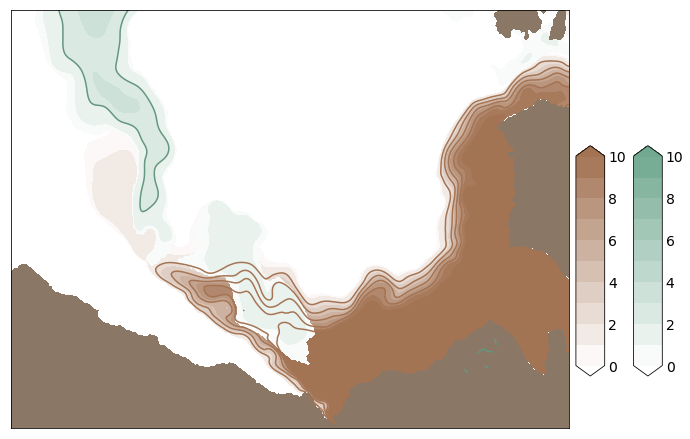

In [50]:
plot_monthly_mackenzie(2003,5)

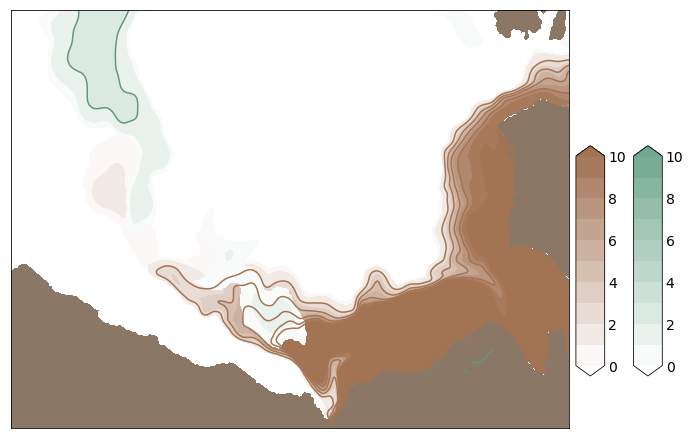

In [51]:
plot_monthly_mackenzie(2003,6)

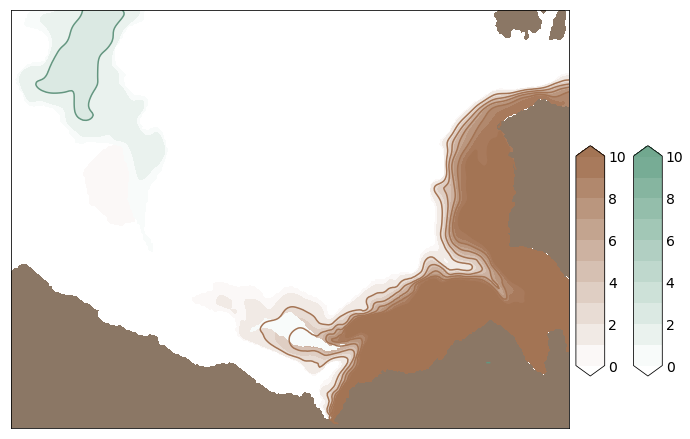

In [52]:
plot_monthly_mackenzie(2003,7)

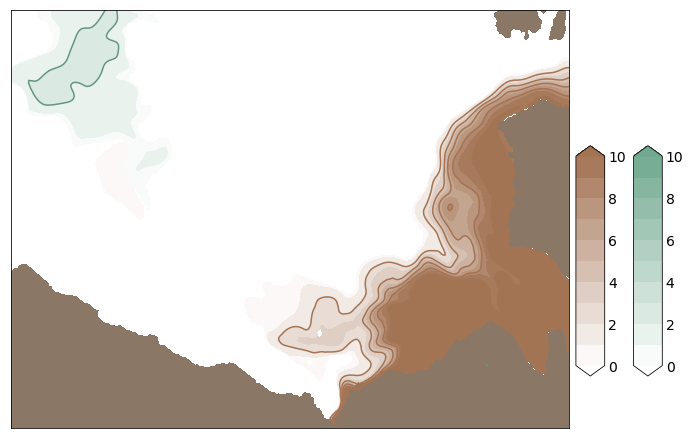

In [53]:
plot_monthly_mackenzie(2003,8)

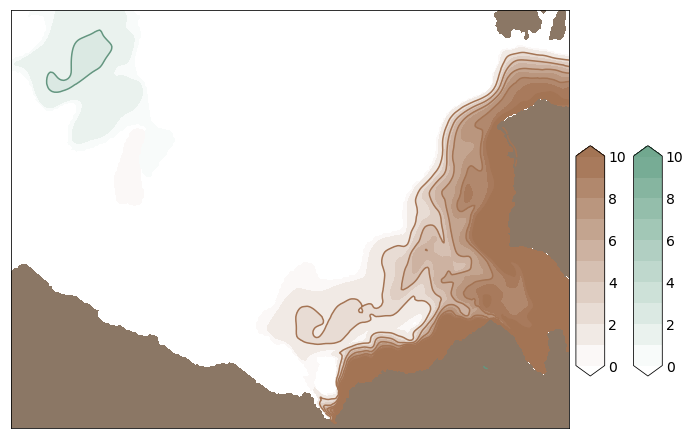

In [54]:
plot_monthly_mackenzie(2003,9)

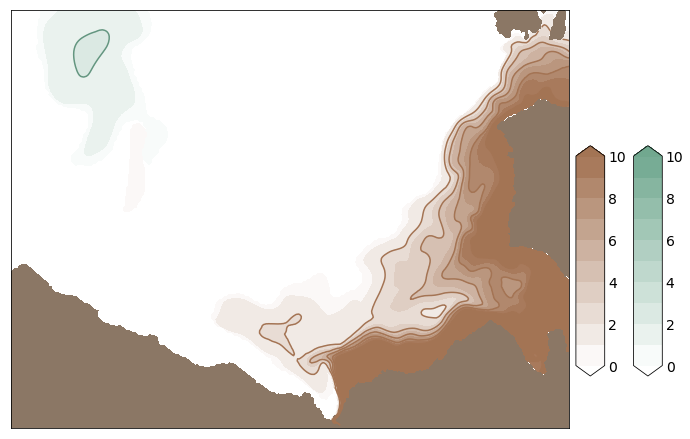

In [55]:
plot_monthly_mackenzie(2003,10)

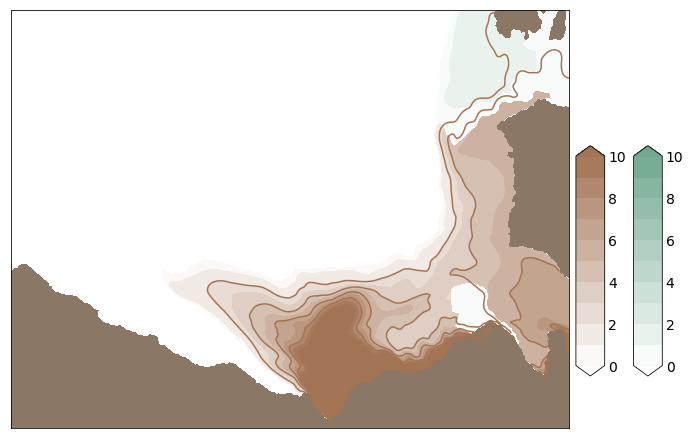

In [44]:
plot_monthly_mackenzie(2014,5)

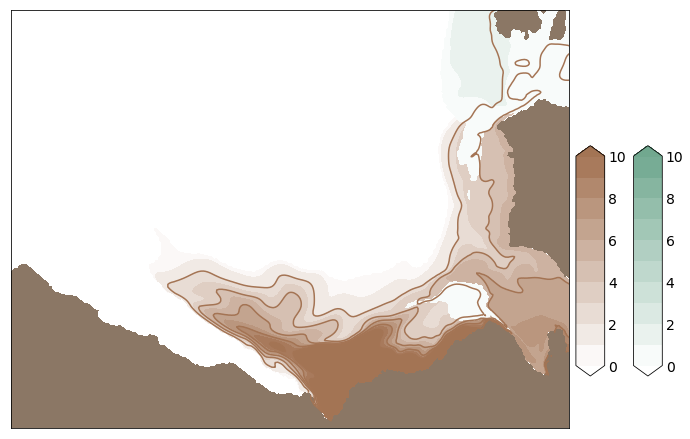

In [45]:
plot_monthly_mackenzie(2014,6)

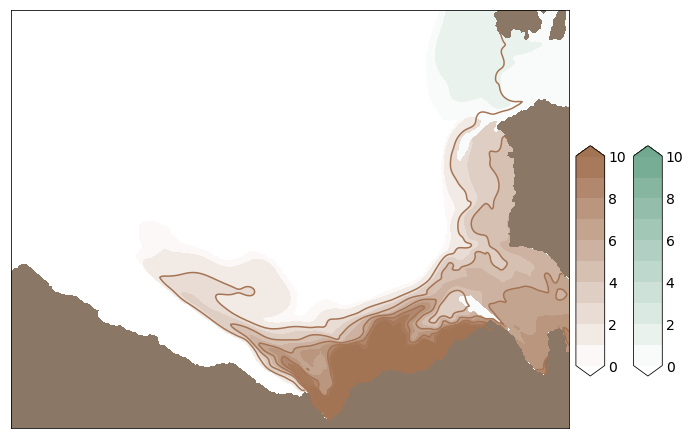

In [46]:
plot_monthly_mackenzie(2014,7)

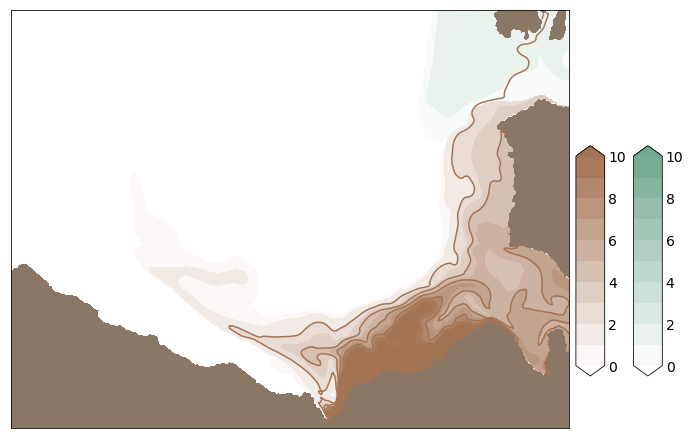

In [47]:
plot_monthly_mackenzie(2014,8)

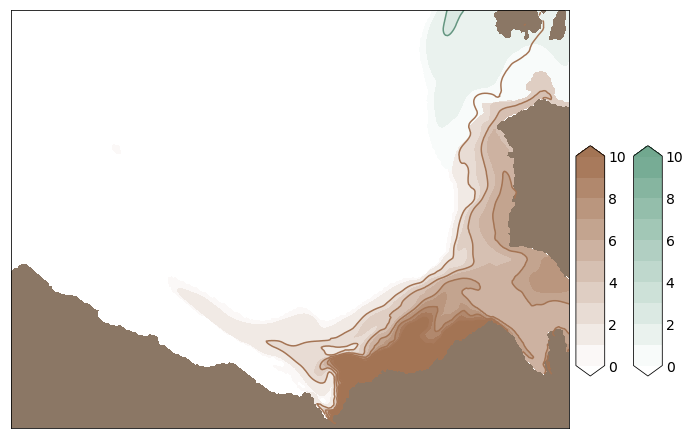

In [48]:
plot_monthly_mackenzie(2014,9)

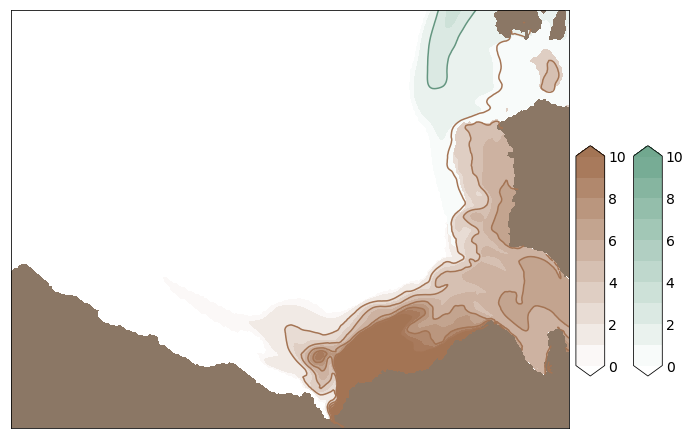

In [49]:
plot_monthly_mackenzie(2014,10)